<a href="https://colab.research.google.com/github/PhamHuuThoai/ML_2023_TV201/blob/main/Project_MayHoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Máy Học**

---
CSV : Air Quality

--
Description :Chứa các phản hồi của thiết bị đa cảm biến khí được triển khai trên thực địa tại một thành phố của Ý

Goal : Dự đoán nhiệt độ trong ngày từ chất lượng không khí


> Project by Phạm Hữu Thoại và Vũ Khắc Tạo






# **Import thư viện**

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/TH8'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/TH8


In [2]:
dataset = pd.read_csv('AirQuality.csv', delimiter=';', encoding='utf-8')
data_pro = dataset[0:200]
data_vip = dataset[0:2000]
data_pro.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
data_pro['Date'] = pd.to_datetime(data_pro['Date'])
features=['CO(GT)','C6H6(GT)','NO2(GT)','T','RH','AH']
data_pro['RH'] = data_pro['RH'].apply(lambda x: float(x.replace(',', '.')))
data_pro['AH'] = data_pro['AH'].apply(lambda x: float(x.replace(',', '.')))
data_pro['T'] = data_pro['T'].apply(lambda x: float(x.replace(',', '.')))
data_pro['CO(GT)'] = data_pro['CO(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_pro['C6H6(GT)'] = data_pro['C6H6(GT)'].apply(lambda x: float(x.replace(',', '.')))
# data['NO2(GT)'] = data['NO2(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_pro[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']] = data_pro[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']].astype(int)

data_vip['Date'] = pd.to_datetime(data_vip['Date'])
features=['CO(GT)','C6H6(GT)','NO2(GT)','T','RH','AH']
data_vip['RH'] = data_vip['RH'].apply(lambda x: float(x.replace(',', '.')))
data_vip['AH'] = data_vip['AH'].apply(lambda x: float(x.replace(',', '.')))
data_vip['T'] = data_vip['T'].apply(lambda x: float(x.replace(',', '.')))
data_vip['CO(GT)'] = data_vip['CO(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_vip['C6H6(GT)'] = data_vip['C6H6(GT)'].apply(lambda x: float(x.replace(',', '.')))
# data['NO2(GT)'] = data['NO2(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_vip[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']] = data_vip[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']].astype(int)


<ipython-input-3-adc4b797ad7e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_pro['Date'] = pd.to_datetime(data_pro['Date'])
<ipython-input-3-adc4b797ad7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pro['Date'] = pd.to_datetime(data_pro['Date'])
<ipython-input-3-adc4b797ad7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pro['RH'] = data_

In [4]:
data_pro.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


# ***Column***

0 Ngày (DD/MM/YYYY)

1 Thời gian (HH.MM.SS)

2 Nồng độ CO trung bình thực hàng giờ tính bằng mg/m^3 (máy phân tích tham chiếu)

3 Phản ứng cảm biến trung bình hàng giờ PT08.S1 (thiếc oxit) (nhắm mục tiêu CO trên danh nghĩa )

4 Nồng độ HydroCarbon Non Metanic tổng thể trung bình thực tính bằng microg/m^3 (máy phân tích tham chiếu)

5 Nồng độ Benzen trung bình thực trung bình hàng giờ tính bằng microg/m^3 (máy phân tích tham chiếu)

6 PT08.S2 (titania) Độ phản hồi của cảm biến trung bình mỗi giờ (trên danh nghĩa là NMHC được nhắm mục tiêu)

7 Nồng độ NOx trung bình thực theo giờ tính bằng ppb (máy phân tích tham chiếu)

8 PT08.S3 (oxit vonfram) Phản ứng cảm biến trung bình theo giờ (nhắm mục tiêu NOx trên danh nghĩa)

9 Nồng độ NO2 trung bình thực theo giờ tính bằng microg/m^3 (máy phân tích tham chiếu)

10 PT08.S4 (vonfram oxit) phản ứng trung bình hàng giờ của cảm biến (trên danh nghĩa là NO2)

11 PT08.S5 (indium oxide) phản ứng của cảm biến hàng giờ (trên danh nghĩa là O3)

12 Nhiệt độ tính bằng °C

13 Độ ẩm tương đối (%)

14 AH Độ ẩm tuyệt đối

 








# Mô tả dữ liệu

In [5]:

data_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           200 non-null    datetime64[ns]
 1   Time           200 non-null    object        
 2   CO(GT)         200 non-null    int64         
 3   PT08.S1(CO)    200 non-null    float64       
 4   NMHC(GT)       200 non-null    float64       
 5   C6H6(GT)       200 non-null    int64         
 6   PT08.S2(NMHC)  200 non-null    float64       
 7   NOx(GT)        200 non-null    float64       
 8   PT08.S3(NOx)   200 non-null    float64       
 9   NO2(GT)        200 non-null    int64         
 10  PT08.S4(NO2)   200 non-null    float64       
 11  PT08.S5(O3)    200 non-null    float64       
 12  T              200 non-null    int64         
 13  RH             200 non-null    int64         
 14  AH             200 non-null    int64         
 15  Unnamed: 15    0 non-nu

## *Biểu đô hiển thị Nhiệt độ và Độ ẩm'*

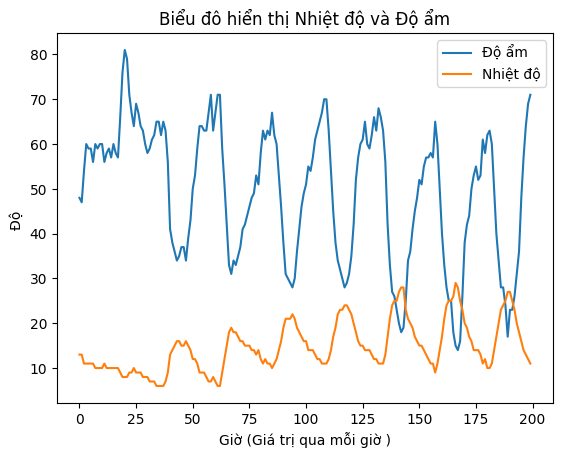

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(data_pro['RH'],  label="sine")
plt.title('Biểu đô hiển thị Nhiệt độ và Độ ẩm')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('Độ ')
plt.plot(data_pro['T'])
plt.legend(('Độ ẩm','Nhiệt độ'))
plt.show()

## *Biểu đô hiển thị nồng độ indium oxide*

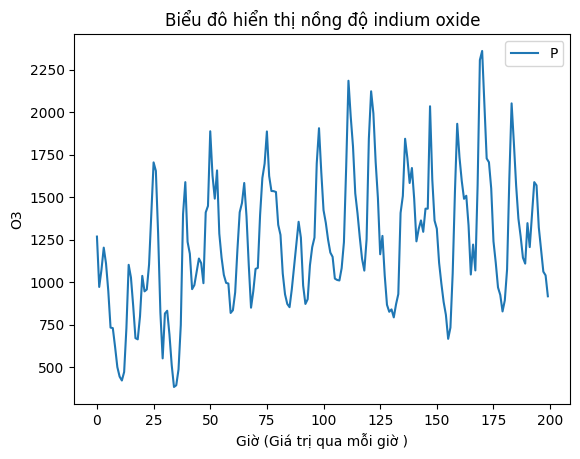

In [7]:
plt.title('Biểu đô hiển thị nồng độ indium oxide')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('O3')
plt.plot(data_pro['PT08.S5(O3)'])
plt.legend(('PT08.S5(O3)'))
plt.show()

## *Biểu đồ oxit vonfram*

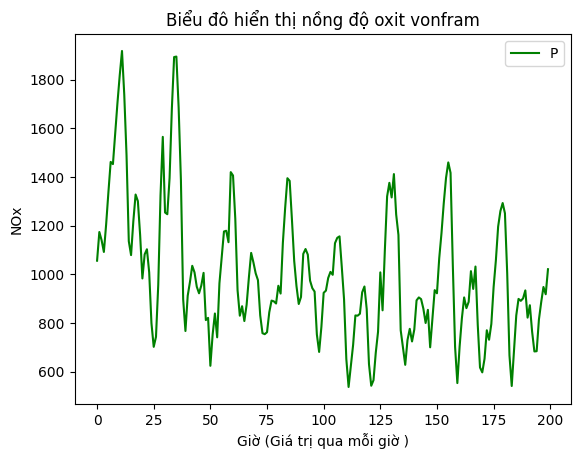

In [8]:
plt.title('Biểu đô hiển thị nồng độ oxit vonfram')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('NOx')
plt.plot(data_pro['PT08.S3(NOx)'],'g')
plt.legend(('PT08.S3(NOx)'))
plt.show()

## *Biểu đồ titania*

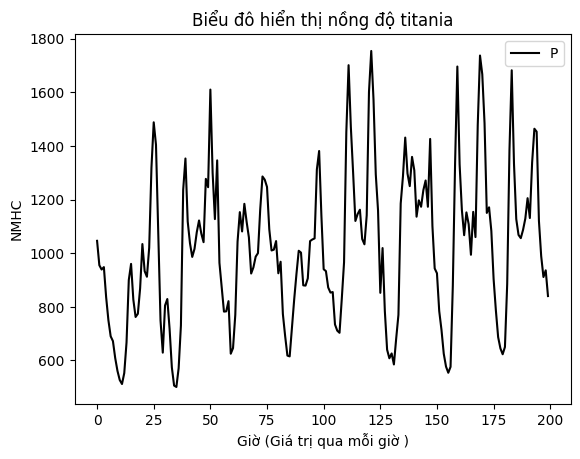

In [9]:
plt.title('Biểu đô hiển thị nồng độ titania')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('NMHC')
plt.plot(data_pro['PT08.S2(NMHC)'],'k')
plt.legend(('PT08.S2(NMHC)'))
plt.show()

## *Biểu đồ thiếc oxit*

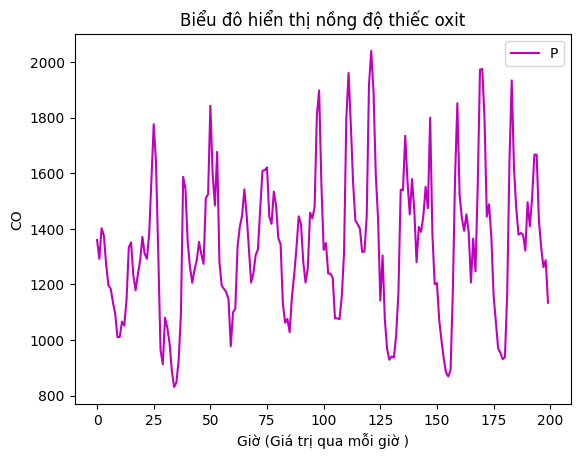

In [10]:

plt.title('Biểu đô hiển thị nồng độ thiếc oxit')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('CO')
plt.plot(data_pro['PT08.S1(CO)'],'m')
plt.legend(('PT08.S1(CO)'))
plt.show()


## *Biểu đô hiển thị nồng độ khí CO ,NMHC,NOx,C6H6,NO2*

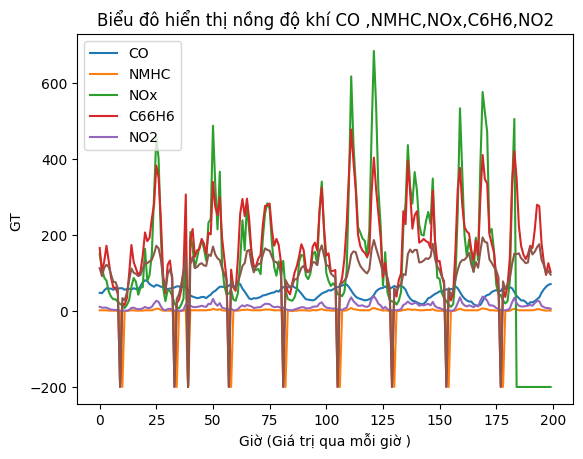

In [11]:
plt.plot(data_pro['RH'],  label="sine")
plt.title('Biểu đô hiển thị nồng độ khí CO ,NMHC,NOx,C6H6,NO2')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('GT ')
plt.plot(data_pro['CO(GT)'])
plt.plot(data_pro['NMHC(GT)'])
plt.plot(data_pro['NOx(GT)'])
plt.plot(data_pro['C6H6(GT)'])
plt.plot(data_pro['NO2(GT)'])
plt.legend(('CO','NMHC','NOx','C66H6','NO2'))
plt.show()

# ***Neural Network***


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
features=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'RH', 'AH']
X = data_vip[features]
y = data_vip['T']
X_train , X_test , y_train , y_test =train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 0 )

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load data
data = data_vip[1:2000]

# Xử lý dữ liệu
data = data.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
data = data.dropna()

# chia dữ liệu
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# xây dựng model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
#số lượng đặc trưng (features)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100
50/50 [==============================] - 2s 3ms/step - loss: 838.7036 - accuracy: 0.7023
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 741.2558 - accuracy: 0.7523
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 549.0801 - accuracy: 0.7767
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 267.4654 - accuracy: 0.7148
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 59.6356 - accuracy: 0.6942
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 2.3574 - accuracy: 0.7161
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.7967
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.8224
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1511 - accuracy: 0.8380
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.8512


In [14]:
# Đánh giá mô hình
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
print(X_test)
# # Chuẩn bị dữ liệu mới
# data_vip = data_vip.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
# data_vip = data_vip.drop(['T'], axis=1)
# data_vip = data_vip.dropna()
# X_new = data_vip[1000:1001]
# print(X_new)
# # Dự đoán đầu ra của các mẫu trong tập dữ liệu mới
# y_pred = model.predict(X_new)
# print(y_pred)

Test loss: 0.07136952877044678
Test accuracy: 0.9075000286102295
13/13 [==============================] - 0s 2ms/step
[[ 0.50967686  0.10446156  0.78830328 ... -0.31747155  0.17488369
  -0.40786682]
 [ 0.57120007  2.18584098  4.55858744 ...  2.56146227  0.11281065
   0.3474946 ]
 [ 0.49737222 -0.53262733  0.28346183 ... -1.09718279 -0.10444496
   0.72517531]
 ...
 [-1.97586068 -1.24643374 -0.76628785 ... -1.38457635  0.05073762
  -0.23161583]
 [ 0.49737222 -0.64603583  0.29548187 ... -1.14716428  0.08177414
  -0.13090097]
 [ 0.48506758 -0.2491061   0.27544847 ... -0.14503541  0.0197011
   0.42303074]]


# ***Decision Tree***

In [ ]:

# features=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
#        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
#        'PT08.S5(O3)', 'RH', 'AH']
# X = data_pro[features]
# y = data_pro['T']

A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      50.000000             50.000000          50.000000      50.000000
mean        0.907500              0.923354           0.922983       0.922841
std         0.019273              0.016270           0.017262       0.016189
min         0.858934              0.880401           0.875370       0.884750
25%         0.896633              0.912887           0.912357       0.911740
50%         0.909375              0.926662           0.926196       0.925294
75%         0.924042              0.934223           0.936609       0.936097
max         0.931250              0.949642           0.948663       0.943554
B. Final Validation on Test Set
 accuracy  precision   recall      f1
   0.9475    0.96098 0.953615 0.95713


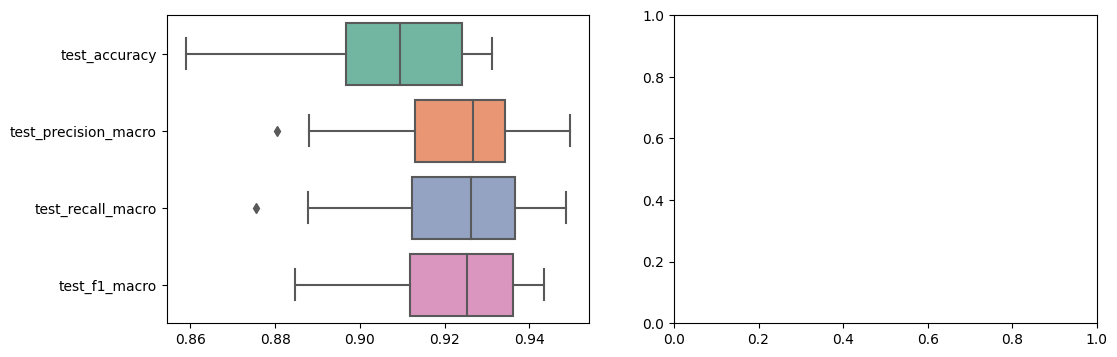

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold

X_train , X_test , y_train , y_test =train_test_split(X , y, train_size=0.8, test_size=0.2, random_state = 0 )
# Build Decision Tree Classifier model
model = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=rskf)
cv_scores = pd.DataFrame(scores).iloc[:, 2:]
print('A. Cross Validation on Training Set')
print(cv_scores.describe())


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'f1': [f1_score (y_test, y_pred ,average='macro',zero_division=1)]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
plt.show()

# **Mô hình RandomForest**

A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      50.000000             50.000000          50.000000      50.000000
mean        0.907688              0.922889           0.922806       0.922464
std         0.017634              0.016017           0.016509       0.015599
min         0.862500              0.877952           0.882063       0.887814
25%         0.894450              0.914100           0.910350       0.910230
50%         0.909375              0.923671           0.926573       0.925300
75%         0.921094              0.934116           0.935393       0.933399
max         0.937500              0.951006           0.954642       0.949006
B. Final Validation on Test Set
 accuracy  precision   recall      f1
   0.9475    0.96098 0.953615 0.95713


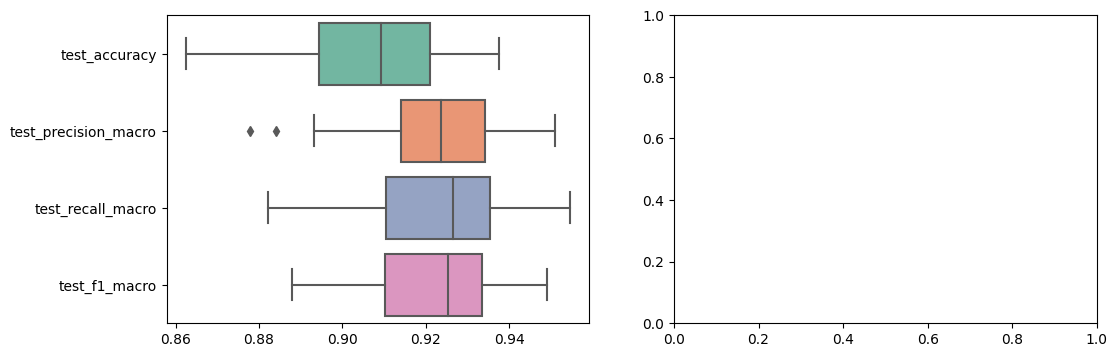

In [16]:
random = RandomForestClassifier(random_state=1)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=rskf)
cv_scores = pd.DataFrame(scores).iloc[:, 2:]
print('A. Cross Validation on Training Set')
print(cv_scores.describe())

random.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'f1': [f1_score
                                 (y_test, y_pred ,average='macro',zero_division=0)]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
plt.show()

# **SVM**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
# from sklearn.metrics import plot_confusion_matrix


#  Build SVM model
model = SVC(kernel='linear')

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=rskf)
cv_scores = pd.DataFrame(scores).iloc[:, 2:]
print('A. Cross Validation on Training Set')
print(cv_scores.describe())

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'f1': [f1_score
                                 (y_test, y_pred ,average='macro',zero_division=0)]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
plt.show()



# **kNN**

A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      50.000000             50.000000          50.000000      50.000000
mean        0.833902              0.865475           0.850128       0.856218
std         0.018179              0.016674           0.017345       0.016227
min         0.790625              0.824582           0.818967       0.821605
25%         0.819531              0.851158           0.837062       0.840876
50%         0.835938              0.865864           0.851277       0.858895
75%         0.846755              0.877323           0.860472       0.867459
max         0.868750              0.899215           0.892965       0.889174
B. Final Validation on Test Set
 accuracy  precision   recall       f1
     0.84   0.874258 0.861254 0.866937


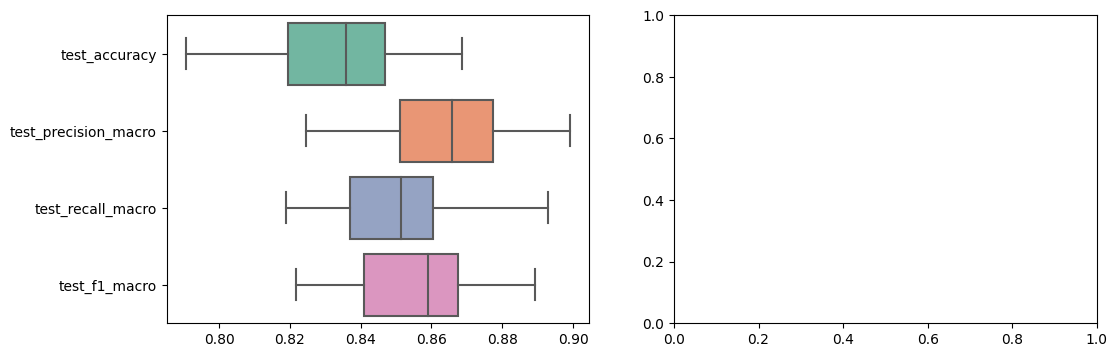

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Build kNN model
model = KNeighborsClassifier(n_neighbors=5)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=rskf)
cv_scores = pd.DataFrame(scores).iloc[:, 2:]
print('A. Cross Validation on Training Set')
print(cv_scores.describe())

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'f1': [f1_score
                                 (y_test, y_pred ,average='macro',zero_division=0)]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
plt.show()

# **Naïve Bayes**

A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      50.000000             50.000000          50.000000      50.000000
mean        0.748969              0.790778           0.788130       0.789011
std         0.025480              0.020786           0.019331       0.019771
min         0.705329              0.753628           0.751254       0.752340
25%         0.728125              0.773097           0.773733       0.772316
50%         0.753125              0.793035           0.788348       0.790612
75%         0.767969              0.806191           0.802325       0.804771
max         0.790625              0.826620           0.826956       0.826424
B. Final Validation on Test Set
 accuracy  precision   recall       f1
    0.765   0.809946 0.805617 0.807615


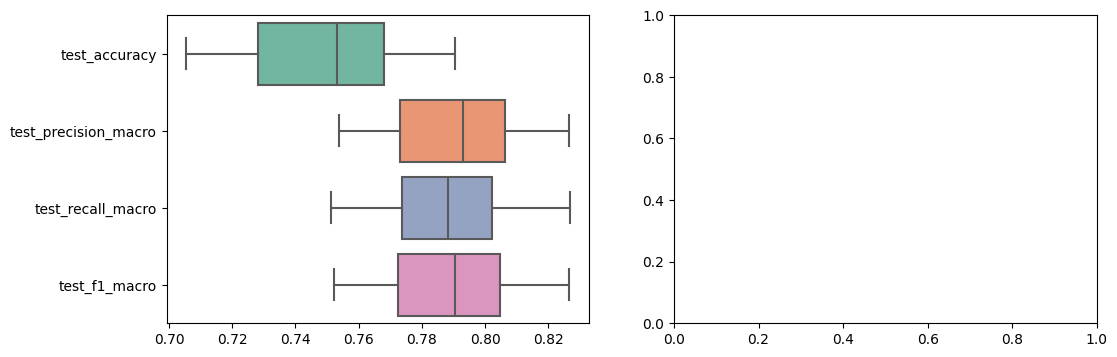

In [18]:
from sklearn.naive_bayes import GaussianNB
# Build Naïve Bayes model
model = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=rskf)
cv_scores = pd.DataFrame(scores).iloc[:, 2:]
print('A. Cross Validation on Training Set')
print(cv_scores.describe())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred ,average='macro',zero_division=0)],
                                 'f1': [f1_score
                                 (y_test, y_pred ,average='macro',zero_division=0)]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
plt.show()